<a href="https://colab.research.google.com/github/Varun-531/FML/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from statsmodels.tsa.stattools import adfuller
rcParams['figure.figsize']=10,6

In [7]:
temp = pd.read_csv("/content/AirPassengers.csv")
temp.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [8]:
temp.shape

(144, 2)

In [9]:
temp['Month']=pd.to_datetime(temp['Month'], infer_datetime_format=True)
indexedData = temp.set_index(['Month'])

In [10]:
indexedData.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


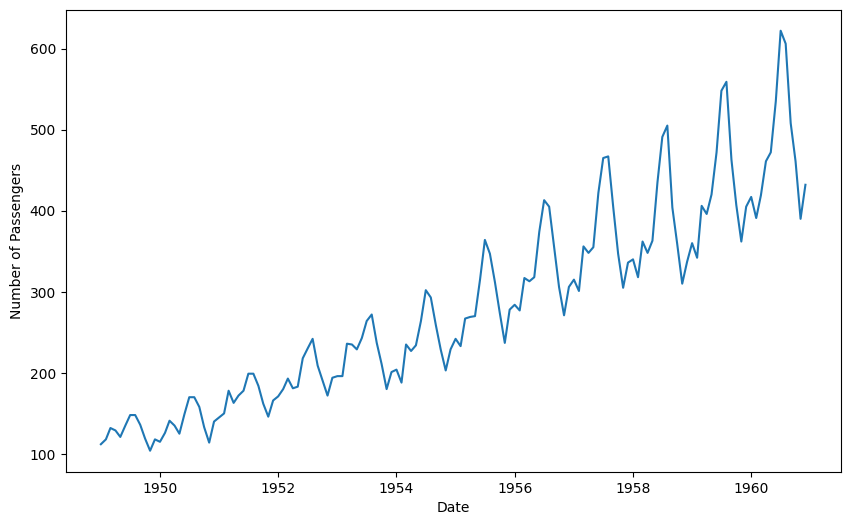

In [11]:
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.plot(indexedData)

In [12]:
rolmean = indexedData.rolling(window=12).mean()
rolstd = indexedData.rolling(window = 12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


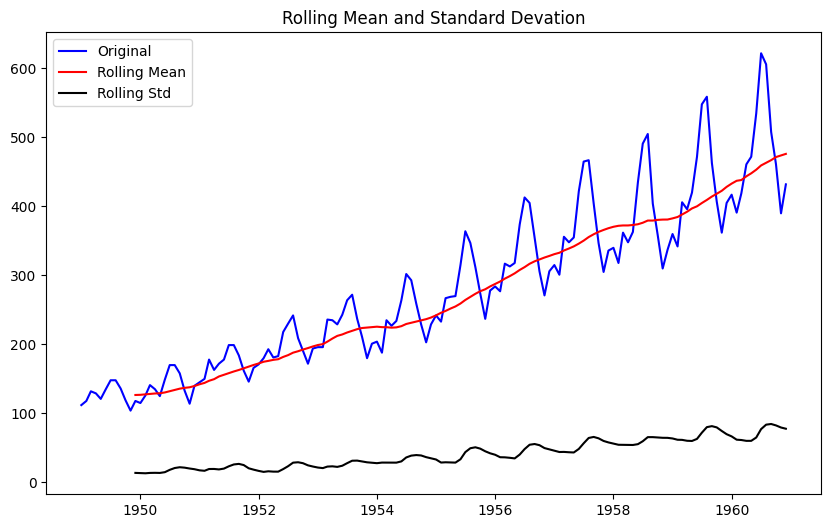

In [13]:
orig = plt.plot(indexedData, color='blue', label='Original')
mean = plt.plot(rolmean, color= 'red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label="Rolling Std")
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Devation")
plt.show()

In [14]:
result = adfuller(indexedData['#Passengers'])
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
  print('\t{}: {}'.format(key,value))


ADF Statistic:0.8153688792060498
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


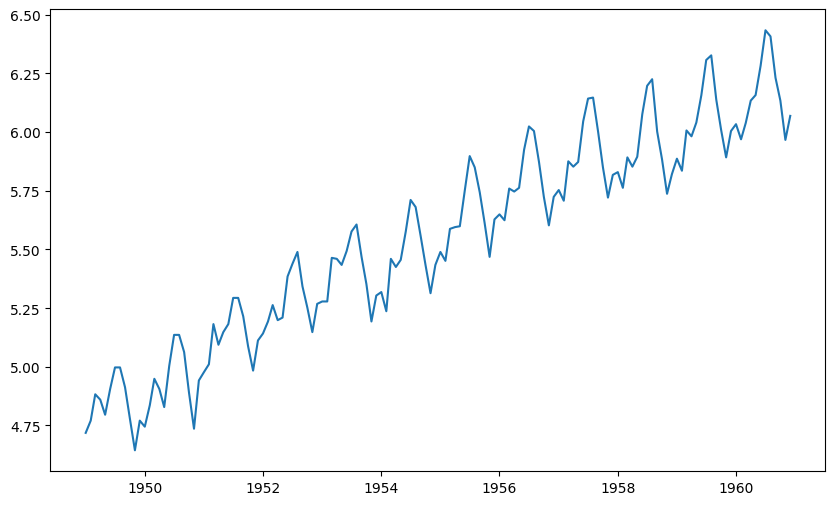

In [15]:
df_log = np.log(indexedData)
plt.plot(df_log)

In [24]:
def get_stationarity(timeseries):
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    original = plt.plot(timeseries, color= 'blue', label= 'Original')
    mean = plt.plot(rolling_mean, color= 'red', label= 'Rolling Mean')
    std = plt.plot(rolling_std, color= 'black', label= 'Rolling Std')
    plt.legend(loc='best')
    plt.title( 'Rolling Mean & Standard Deviation')
    plt.show(block=False)
    result = adfuller(timeseries[ '#Passengers'])
    print('ADF Statistic: {}'.format (result[0]))
    print( 'p-value: {}' .format(result[1]))
    print( 'Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}' .format(key, value))


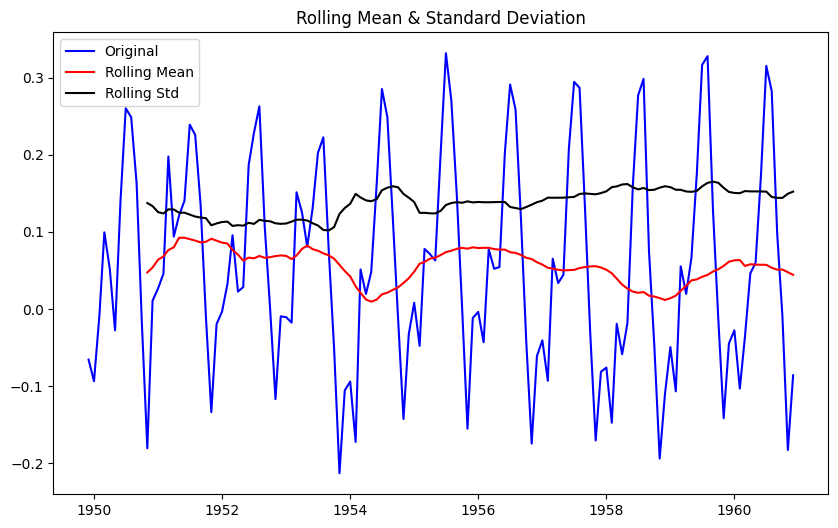

ADF Statistic: -3.1629079913008833
p-value: 0.022234630001242206
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [25]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)


In [36]:
from statsmodels. tsa. seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


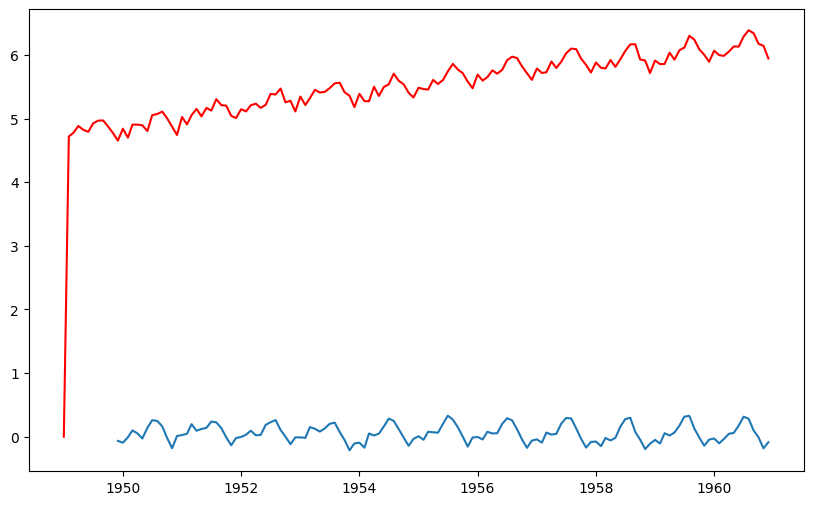

In [49]:
decomposition = seasonal_decompose(df_log)
model = ARIMA(df_log, order=(2, 1, 2))
results = model.fit()
plt.plot(df_log_minus_mean)

# plt.plot(decomposition.res/id)  # Or the appropriate component from decomposition
plt.plot(results.fittedvalues, color='red')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


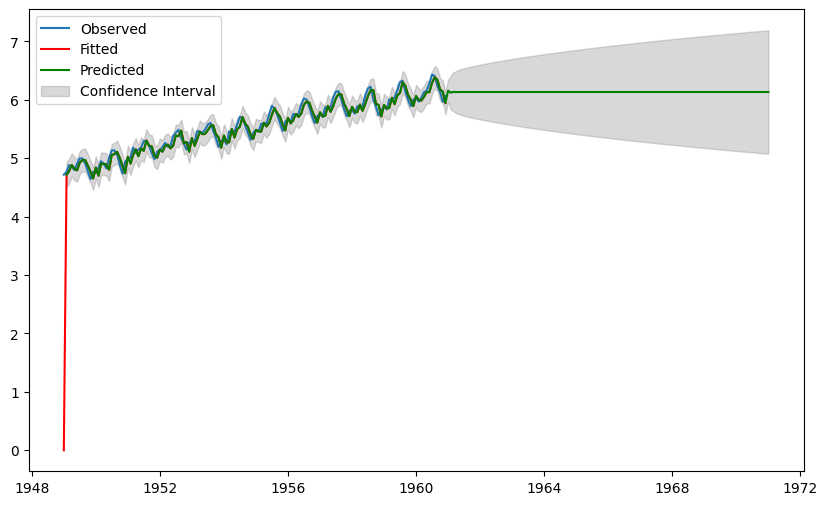

In [51]:
# results.plot_predict(1,264)

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(df_log)
model = ARIMA(df_log, order=(2, 1, 2))
results = model.fit()

# Plot observed values, fitted values, and predicted values
plt.plot(df_log, label='Observed')
plt.plot(results.fittedvalues, color='red', label='Fitted')
pred_start = 1
pred_end = 264
pred = results.get_prediction(start=pred_start, end=pred_end)
pred_values = pred.predicted_mean
pred_conf_int = pred.conf_int()
plt.plot(pred_values, color='green', label='Predicted')
plt.fill_between(pred_conf_int.index, pred_conf_int.iloc[:, 0], pred_conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.show()
